# 선형 회귀
> **Y = H(x)**  
입력 특성의 가중치 합과 편향을 더한 값으로 예측하는 것  
나올 수 있는 값이 **연속적임**  
주로 **평균 제곱근 오차(RMSE)** 를 측정 지표로 사용함  
그런데 **평균 제곱 오차(MSE)** 를 최소화하는 것이 같은 결과를 내면서 더 간단하다고 함?

---
## 1. 비용함수를 최소화하는 방법
### 1.1 정규방정식
비용함수를 최소화하는 **가중치(세타)** 를 찾기 위한 **해석적인 방법**  
즉 바로 결과를 얻을 수 있는 수학 공식이 있음  

In [16]:
import numpy as np

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

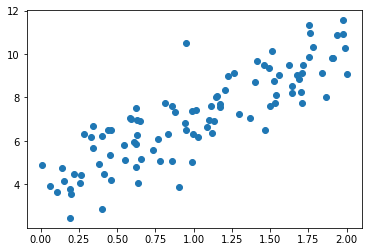

In [17]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

In [18]:
x_with_bias = np.c_[np.ones((100, 1)), x]
best_theta = np.linalg.inv(x_with_bias.T.dot(x_with_bias)).dot(x_with_bias.T).dot(y)

In [19]:
best_theta

array([[3.88505287],
       [3.16382547]])

데이터를 생성하기 위해 만든 함수는 **y = 4 + 3x + 가우시안잡음** 임  
따라서 theat[0] = 4, theta[1] = 3을 기대했었음  
그런데 잡음때문에 원래의 파라미터를 정확하게 재현하진 못함

In [20]:
best_predict = x_with_bias.dot(best_theta)
y_clean = 4 + 3*x

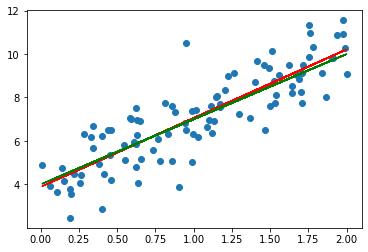

In [21]:
plt.scatter(x, y)
plt.plot(x, best_predict, "r-")
plt.plot(x, y_clean, "g-")
plt.show()

노이즈가 없는 정답값과 정규방정식을 통해 구해낸 예측을 시각화한 모습  
물론 직접 정규방정식을 세우지 않고 사이킷런을 통해 간단하게 구할 수도 있음

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

In [23]:
lin_predict = lin_reg.predict(x)

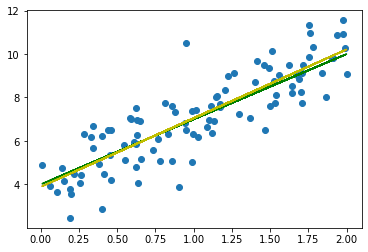

In [25]:
plt.scatter(x, y)
plt.plot(x, best_predict, "r-")
plt.plot(x, y_clean, "g-")
plt.plot(x, lin_predict, "y-")
plt.show()

위에 정규방정식을 통해 시각화한 직선과 동일한 것을 확인

## 계산 복잡도
정규방정식이 역행렬을 계산하는 계산 복잡도는 일반적으로 O(n^2.4)에서 O(n^3)사이라고 함  
사이킷런의 LinearRegression 클래스는 SVD를 사용하는데 이 계산 복잡도는 O(n^2)라고 함  
> 특성의 개수가 2배 늘어나면 걸리는 시간이 4배가 되는 것임  
  
이제 특성이 매우 많고 훈련 샘플이 너무 많아 메모리가 부족하여 정규방정식을 사용할 수 없을 때 적합한 방법을 소개함

---
## 1.2 경사 하강법
비용 함수를 최소화하기 위해 반복해서 파라미터를 조정하는 방법  
> 1. 세타값을 무작위로 초기화  
2. 비용함수가 감소되는 방향으로 조금씩 전진  
3. 최솟값에 수렴할 때까지 반복  
  
이때 가장 중요한 하이퍼파라미터로 **학습률**이 있음
>학습률이 너무 작으면 시간이 오래걸리고  
학습률이 너무 크면 전역 최솟값에서 발산함  
**따라서 처음 학습률은 크게, 점점 학습률을 작게 조절하는 것이 바람직**

선형 회귀의 비용함수 생김새는 **그릇 모양**을 하고 있음  
이때 특성들의 스케일이 다르면 그릇이 **길쭉한 모양**을 한다고 함  
이는 최솟값에 수렴하는 시간이 더 오래 걸림을 의미  
> **특성들의 스케일링이 매우 중요**  
  
(정규 방정식은 특성들의 스케일 상관 없음)

### 배치, 확률적, 미니배치
>**배치 경사하강법**: 전체 데이터에 대한 손실 함수를 계산, 해당 손실 함수를 최소화하는 방향으로 전진  
안정적임, 1스텝에 시간 오래 걸림, 메모리 걱정 해야함  

> **확률적 경사하강법**: 무작위로 선택한 1개의 샘플에 대한 손실 함수를 계산, 해당 손실 함수를 최소화하는 방향으로 전진  
불안정함, 1스텝 매우 빠름, 메모리 걱정이 없어 큰 데이터셋에 적용 가능  

> **배치 경사하강법**: n개의 샘플에 대한 손실 함수를 계산, 해당 손실 함수를 최소화하는 방향으로 전진  
배치와 확률적 방법의 절충안

---
## 2. 다항 회귀 (polynomial regression)
예측할 데이터가 단순한 직선이 아닐 경우에도 선형 모델을 사용할 수 있음  
> **각 특성의 거듭 제곱을 새로운 특성으로 추가하는 것**

In [29]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

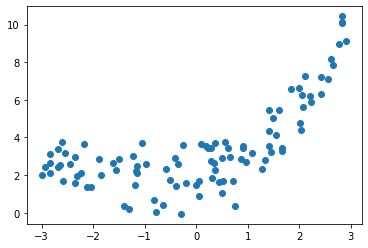

In [30]:
plt.scatter(x, y)
plt.show()

확실히 직선으로 해당 데이터를 예측하기는 오바임  
사이킷런의 **PolynomialFeatures** 를 이용해 특성의 거듭 제곱항이 추가된 새로운 데이터를 구해보겠음

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x[0], x_poly[0]

(array([-2.35204977]), array([-2.35204977,  5.53213811]))

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

LinearRegression()

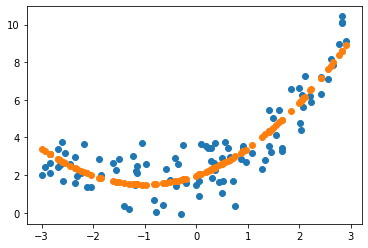

In [40]:
lin_predict = lin_reg.predict(x_poly)
plt.scatter(x, y)
plt.scatter(x, lin_predict)
plt.show()

PolynomialFeatures는 특성이 늘어날 때 **팩토리얼**단위로 늘어남.  
사용하기 매우 어려울듯  
---

## 3. 규제가 있는 선형 모델
선형 모델의 과대 적합을 막는 방법은 모델을 규제하는 것임  
즉 모델의 자유도를 줄이면 됨. 예를 들어 다항식의 차수를 감소시키는 것?  
> 선형 회귀 모델에서는 모델의 가중치를 제한함으로써 규제를 가함  
크게 **릿지**, **라쏘**, **엘라스틱넷** 방법이 있음

### 3.1 릿지 회귀
각 파라미터의 **제곱값 * 알파**가 비용함수에 추가됨.  
이는 모델의 가중치가 가능한 한 작게 유지되도록 해줌.  
**알파** 는 모델을 얼마나 많이 규제할지 조절함.  
> **a=0이면** 릿지 회귀는 선형 회귀와 같아짐.  
**a가 매우 크면** 모든 가중치가 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 됨 (과소적합)  

규제항은 훈련하는 동안에만 비용 함수에 추가됨. 훈련이 끝나면 규제가 없는 성능 지표로 평가함.  
> **일반적으로 훈련하는 동안 사용되는 비용함수와 테스트에서 사용되는 성능 지표는 다름.**  
훈련에 사용되는 비용 함수는 최적화를 위해 미분이 가능해야 하고,  
테스트에 사용되는 비용 함수는 최종 목표에 가능한 한 가까워야 함.

In [41]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(x, y)
ridge_reg.predict([[1.5]])

array([[4.74912629]])

In [44]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(x, y)
sgd_reg.predict([[1.5]])

c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([4.74054509])

**penalty** 매개변수는 사용할 규제를 지정함.  
"ㅣ2"는 SGD가 비용함수에 가중치 벡터의 l2노름 제곱을 2로 나눈 규제항을 추가함  
즉 릿지 회귀와 같음

## 3.2 라쏘 회귀
릿지 회귀처럼 비용 함수에 규제항을 더하는 것은 같지만 l2노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 **l1노름**을 사용  
라쏘 회귀의 중요한 특징은  
> 덜 중요한 특성의 가중치를 제거하려고 함  
라쏘를 사용하면 경사 하강법이 최적점 근처에서 진동함 -> 막으려면 점진적으로 학습률을 감소시켜야 함  
라쏘의 비용 함수는 **특정 가중치가 0일 때 미분가능하지 않음** -> 서브그레디언트 벡터 사용

In [48]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x, y)
lasso_reg.predict([[1.5]])

array([4.70377456])

In [54]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])

array([4.71999446])

In [58]:
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])

array([4.74304426])

## 3.3 엘라스틱넷

릿지 회귀와 라쏘 회귀를 절충한 모델  
규제항으로 **릿지와 라쏘의 규제항을 혼합 비율 r을 사용해 조절하여 더해서** 사용함  
(r)x(라쏘 규제항) + (1-r)x(릿지 규제항)
> **r=0 이면** 릿지 회귀와 같음  
**r=1이면** 라쏘 회귀와 같음

In [50]:
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_reg.fit(x, y)
elastic_reg.predict([[1.5]])

array([4.70726856])

**l1_ratio** 가 혼합 비율 r임

## 3.4 각 모델의 사용처
일반적으로 평범한 선형 회귀는 피해야 함. 일반적으로 규제가 있는 것이 좋음  
> **기본적으로** 릿지 회귀  
**쓰이는 특성이 몇 개뿐이라고 의심되면** 라쏘나 엘라스틱넷  
**특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있다면** 엘라스틱넷